# Logistic regression

    Build a model to predict the admittance of students based on their SAT.

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Load data

In [2]:
raw_data = pd.read_csv('data/Admittance.csv')
raw_data.head()

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No


In [3]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes': 1, 'No':0})
data

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


### Variables

In [4]:
y = data['Admitted']
x1 = data['SAT']

### Let's plot our data

**Scatter plot**

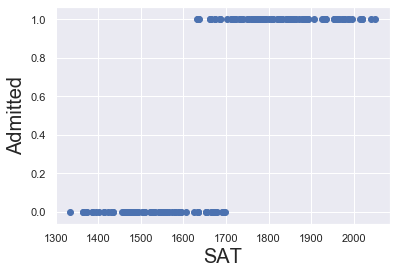

In [5]:
plt.scatter(x1, y, color='C0')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('Admitted', fontsize=20)
plt.show()

**Plot with linear regression line**

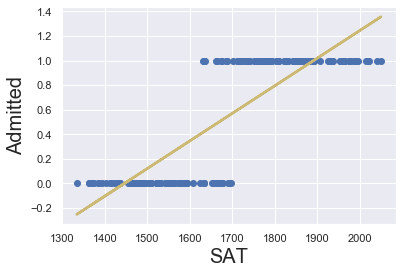

In [9]:
x=sm.add_constant(x1)
reg_lin = sm.OLS(y, x)
results = reg_lin.fit()


plt.scatter(x1, y, color='C0')
y_hat = x1*results.params[1] + results.params[0]

plt.plot(x1, y_hat, lw=2.5, color='C8')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('Admitted', fontsize=20)
plt.show()

the model predict value that fall outside the nature domain of admission. The linear regression doesn't even know that our values are bounded between 0 and 1. The Linear regression does not fit for this type of analysis because the first assumptions of linear regression model which is **LINEARITY** is violated because our data have a non-linear pattern so we must use a non-linear approach.

### Let's build the logistic regression model using statsmodels

In [11]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
result_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


### Logistic regression summary

In [13]:
result_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Tue, 31 Mar 2020   Pseudo R-squ.:                  0.7992
Time:                        12:21:54   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### Let's Add a variable 'gender' to our dataset and create a new logistic model

In [14]:
raw_data = pd.read_csv('data/Admittance with gender.csv')
raw_data

,SAT,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female
2,1954,Yes,Female
3,1653,No,Male
4,1593,No,Male
...,...,...,...
163,1722,Yes,Female
164,1750,Yes,Male
165,1555,No,Male
166,1524,No,Male


In [15]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1, 'No':0})
data['Gender'] = data['Gender'].map({'Female':1, 'Male':0})
data

,SAT,Admitted,Gender
0,1363,0,0
1,1792,1,1
2,1954,1,1
3,1653,0,0
4,1593,0,0
...,...,...,...
163,1722,1,1
164,1750,1,0
165,1555,0,0
166,1524,0,0


### Declare independent and dependent variables

In [21]:
y = data['Admitted']
x1 = data['Gender']

### Regression

In [22]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y, x)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.572260
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Tue, 31 Mar 2020   Pseudo R-squ.:                  0.1659
Time:                        12:54:03   Log-Likelihood:                -96.140
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 6.283e-10
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6436      0.222     -2.901      0.004      -1.078      -0.209
Gender         2.0786      0.363      5.727      0.000       1.367       2.790
==============================================================================
"""

**LLR p-value = 6.283e-10** shows that the model is significant  and the **"Gender" p-value ~ 0** shows us that the variable gender is significant too.   

**Our model equation** is : Log(odds) = -0.64 + 2.08*Gender

### Let's create a new predictor with both "Gender" and "SAT"

In [24]:
y = data['Admitted']
x1 = data[['Gender','SAT']]
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
result_log = reg_log.fit()
result_log.summary()

Optimization terminated successfully.
         Current function value: 0.120117
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      165
Method:                           MLE   Df Model:                            2
Date:                Tue, 31 Mar 2020   Pseudo R-squ.:                  0.8249
Time:                        13:01:36   Log-Likelihood:                -20.180
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.118e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -68.3489     16.454     -4.154      0.000    -100.598     -36.100
Gender         1.9449      0.846      2.299      0.022       0.287       3.603
SAT            0.0406      0.010      4.129      0.000       0.021       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Given the same SAT score, a female has **np.exp(1.9449) = 7** times higher odds to get admitted than a male. So it looks like based on our dataset it is much easier for females to enter this particular university or degree.

### ACCURACY

In [27]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
result_log.predict()

array([0.00, 1.00, 1.00, 0.23, 0.02, 0.99, 1.00, 1.00, 1.00, 0.01, 1.00,
       1.00, 0.76, 0.00, 0.60, 1.00, 0.11, 0.12, 0.51, 1.00, 1.00, 1.00,
       0.00, 0.01, 0.97, 1.00, 0.48, 0.99, 1.00, 0.99, 0.00, 0.83, 0.25,
       1.00, 1.00, 1.00, 0.31, 1.00, 0.23, 0.00, 0.02, 0.45, 1.00, 0.00,
       0.99, 0.00, 0.99, 0.00, 0.00, 0.01, 0.00, 1.00, 0.92, 0.02, 1.00,
       0.00, 0.37, 0.98, 0.12, 1.00, 0.00, 0.78, 1.00, 1.00, 0.98, 0.00,
       0.00, 0.00, 1.00, 0.00, 0.78, 0.12, 0.00, 0.99, 1.00, 1.00, 0.00,
       0.30, 1.00, 1.00, 0.00, 1.00, 1.00, 0.85, 1.00, 1.00, 0.00, 1.00,
       1.00, 0.89, 0.83, 0.00, 0.98, 0.97, 0.00, 1.00, 1.00, 0.03, 0.99,
       0.96, 1.00, 0.00, 1.00, 0.01, 0.01, 1.00, 1.00, 1.00, 0.00, 0.00,
       0.02, 0.33, 0.00, 1.00, 0.09, 0.00, 0.97, 0.00, 0.75, 1.00, 1.00,
       0.01, 0.01, 0.00, 1.00, 0.00, 0.99, 0.57, 0.54, 0.87, 0.83, 0.00,
       1.00, 0.00, 0.00, 0.00, 1.00, 0.04, 0.00, 0.01, 1.00, 0.99, 0.52,
       1.00, 1.00, 0.05, 0.00, 0.00, 0.00, 0.68, 1.

In [28]:
np.array(data['Admitted'])

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0])

In [36]:
result_log.pred_table()

array([[69.00, 5.00],
       [4.00, 90.00]])

**CONFUSION MATRIX**

In [37]:
cm_df = pd.DataFrame(result_log.pred_table())
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df = cm_df.rename(index={0:'Actual 0', 1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,69.0,5.0
Actual 1,4.0,90.0


Overall the model made an accurate prediction in 159 out of 168 cases **159/168 = 94.6%** accuracy

In [38]:
cm = np.array(cm_df)
accuracy_train = (cm[0,0] + cm[1,1])/cm.sum()
accuracy_train

0.9464285714285714

### Testing the model and assessing its accuracy

In [39]:
test = pd.read_csv('data/Test Admittance  data.csv')
test.head()

,SAT,Admitted,Gender
0,1323,No,Male
1,1725,Yes,Female
2,1762,Yes,Female
3,1777,Yes,Male
4,1665,No,Male


In [40]:
test['Admitted'] = test['Admitted'].map({'Yes': 1, 'No':0})
test['Gender'] = test['Gender'].map({'Female':1, 'Male':0})
test

,SAT,Admitted,Gender
0,1323,0,0
1,1725,1,1
2,1762,1,1
3,1777,1,0
4,1665,0,0
5,1556,1,1
6,1731,1,1
7,1809,1,1
8,1930,1,1
9,1708,1,0


In [47]:
x


,const,Gender,SAT
0,1.0,0,1363
1,1.0,1,1792
2,1.0,1,1954
3,1.0,0,1653
4,1.0,0,1593
...,...,...,...
163,1.0,1,1722
164,1.0,0,1750
165,1.0,0,1555
166,1.0,0,1524


In [46]:
test_actual = test['Admitted']
test_data = test.drop(['Admitted'], axis=1)
test_data = sm.add_constant(test_data)
test_data = test_data[x.columns.values]
test_data

,const,Gender,SAT
0,1.0,0,1323
1,1.0,1,1725
2,1.0,1,1762
3,1.0,0,1777
4,1.0,0,1665
5,1.0,1,1556
6,1.0,1,1731
7,1.0,1,1809
8,1.0,1,1930
9,1.0,0,1708


In [48]:
def confusion_matrix(data, actual_values, model):
    pred_values = model.predict(data)
    bins=np.array([0,0.5,1])
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    accuracy = (cm[0,0] + cm[1,1])/cm.sum()
    return cm, accuracy

In [50]:
cm = confusion_matrix(test_data, test_actual, result_log)
cm

(array([[5.00, 1.00],
        [1.00, 12.00]]),
 0.8947368421052632)

In [52]:
cm_df = pd.DataFrame(cm[0])
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df = cm_df.rename(index={0:'Actual 0', 1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,5.0,1.0
Actual 1,1.0,12.0


**Missclassification Rate** : opposite of accuracy

In [53]:
print('missclassification rate: ' + str((1+1)/19))

missclassification rate: 0.10526315789473684
